In [1]:
pip install vk

  Created wheel for vk: filename=vk-2.0.2-py3-none-any.whl size=8277 sha256=53c344aa7789627ffdfe4d83f5443d64281e7a999168a2155d3985c383999834
Note: you may need to restart the kernel to use updated packages.
  Stored in directory: c:\users\злата\appdata\local\pip\cache\wheels\d3\da\b6\05c724eaf56853655695a546806e6bdf62fa6c3704adf771c0
Successfully built vk


In [4]:
pip install vk_api

Note: you may need to restart the kernel to use updated packages.


In [120]:
# Импорт необходимых библиотек
import vk
import vk_api
import requests
from datetime import datetime, timedelta
import pandas as pd
import re
import itertools
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
import time
import json
from tqdm import tqdm
import seaborn as sns

In [121]:
%matplotlib inline

## Старт сессии ВК

In [62]:
with open('token.txt') as f:
    token = f.read()

In [92]:
def getAccessToken(filename):
    file = open(filename, "r")
    token = file.read()
    file.close()
    return token

In [93]:
token = getAccessToken("token.txt")
session = vk.Session(access_token = token)
vk_api = vk.API(session)

## Выгрузка друзей

In [72]:
def getUserFriendsAmount(user_id):
    N_friends = vk_api.friends.get(user_id = user_id, v = 5.131)['count']
    return N_friends

In [73]:
def getUserFriends(user_id, N):
    user_friends = vk_api.friends.get(user_id = user_id, count = N, v = 5.131)['items']
    return user_friends

In [74]:
def writeRequestResultToJSON(request_response, name):
    with open('json_{name}.json'.format(name = name), 'w') as outfile:
        json.dump(request_response, outfile)

In [75]:
def readRequestResultFromJSON(filename):
    with open(filename, 'r') as infile:
        data = json.load(infile)
    return data

In [76]:
def getUserFriendsData(friend_ids, additional_fields):
    users = []
    for friend_id in tqdm(friend_ids):
        user = vk_api.users.get(user_id = friend_id, fields = additional_fields, v = 5.131)
        time.sleep(.2)
        users.append(user)
    return users

In [79]:
# Пользователь Александр Панчин
user_id = 187756

In [81]:
N_friends = getUserFriendsAmount(user_id)
print('У пользователя {} друзей'.format(N_friends))

У пользователя 5808 друзей


In [ ]:
# поля для отбора пользователя
fields_name = ['first_name', 'last_name', 'id', 'sex', 'bdate', 'country',
               'home_town', 'has_mobile', 'followers_count', 'common_count', 
               'is_closed', 'can_access_closed', 'can_see_audio',
               'online', 'city', 'timezone', 'can_post',
               'can_write_private_message', 'can_see_all_posts',
               'contacts', 'status', 'relation', 'universities',
               'nickname', 'deactivated', 'counters', 'has_photo',
               'occupation', 'site', 'wall_default']

In [85]:
user_friends = getUserFriends(user_id, N_friends/2)

In [86]:
writeRequestResultToJSON(user_friends, 'friends')

In [87]:
friends_data = readRequestResultFromJSON("json_friends.json")
friends_data

[6,
 242,
 908,
 1119,
 1649,
 2050,
 2150,
 2646,
 3016,
 3422,
 3768,
 4181,
 4533,
 5121,
 5165,
 5236,
 5245,
 5304,
 5381,
 5944,
 6172,
 6184,
 6938,
 7304,
 8046,
 8211,
 9505,
 10254,
 10894,
 10911,
 12013,
 12482,
 14521,
 14616,
 14758,
 14983,
 15004,
 15692,
 15908,
 16077,
 16990,
 17077,
 17346,
 17361,
 17376,
 17989,
 18610,
 20351,
 20673,
 20724,
 20984,
 21080,
 22409,
 23012,
 23174,
 23260,
 23311,
 23879,
 23903,
 24433,
 24783,
 26519,
 27225,
 28047,
 28087,
 28428,
 29750,
 30721,
 31331,
 31878,
 31906,
 32384,
 33239,
 33895,
 34481,
 36778,
 37983,
 38775,
 38986,
 39201,
 39766,
 40534,
 41994,
 42646,
 44324,
 44546,
 47241,
 49272,
 49283,
 50260,
 51273,
 51347,
 52767,
 52859,
 55047,
 56332,
 56709,
 56902,
 56944,
 57126,
 57825,
 58853,
 59292,
 60254,
 64695,
 66819,
 68406,
 68529,
 68863,
 70728,
 70995,
 71160,
 71596,
 71706,
 72903,
 73115,
 73575,
 74385,
 74651,
 75791,
 77078,
 78029,
 79112,
 79238,
 80777,
 82931,
 83060,
 83503,
 85082,


In [88]:
len(friends_data)

2904

In [95]:
additional_fields = ['sex', 'bdate', 'country',
               'home_town', 'has_mobile', 'followers_count'
               'can_see_audio',
               'online', 'city', 'timezone', 'can_post',
               'can_write_private_message', 'can_see_all_posts',
               'contacts', 'status', 'relation', 'universities',
               'nickname', 'deactivated', 'counters', 'has_photo',
               'occupation', 'site', 'wall_default']

In [96]:
users = getUserFriendsData(friends_data, additional_fields)

100%|██████████████████████████████████████████████████████████████████████████████| 2904/2904 [13:46<00:00,  3.51it/s]


In [97]:
users[0]

[{'id': 6,
  'nickname': '',
  'city': {'id': 2, 'title': 'Saint Petersburg'},
  'country': {'id': 1, 'title': 'Russia'},
  'has_photo': 1,
  'has_mobile': 1,
  'can_post': 0,
  'can_see_all_posts': 0,
  'wall_default': 'owner',
  'can_write_private_message': 0,
  'site': 'https://telegram.org',
  'status': 'Some people choose to see the ugliness in this world, the disarray. I choose to see the beauty.',
  'occupation': {'id': 1, 'name': 'СПбГУ', 'type': 'university'},
  'counters': {'albums': 2,
   'audios': 14,
   'followers': 55152,
   'pages': 137,
   'photos': 21,
   'subscriptions': 13,
   'videos': 32,
   'clips_followers': 55444},
  'sex': 2,
  'online': 0,
  'first_name': 'Nikolay',
  'last_name': 'Durov',
  'can_access_closed': True,
  'is_closed': False}]

In [144]:
writeRequestResultToJSON(users, 'users')

In [145]:
users_data = readRequestResultFromJSON("json_users.json")
users_data[0]

[{'id': 6,
  'nickname': '',
  'city': {'id': 2, 'title': 'Saint Petersburg'},
  'country': {'id': 1, 'title': 'Russia'},
  'has_photo': 1,
  'has_mobile': 1,
  'can_post': 0,
  'can_see_all_posts': 0,
  'wall_default': 'owner',
  'can_write_private_message': 0,
  'site': 'https://telegram.org',
  'status': 'Some people choose to see the ugliness in this world, the disarray. I choose to see the beauty.',
  'occupation': {'id': 1, 'name': 'СПбГУ', 'type': 'university'},
  'counters': {'albums': 2,
   'audios': 14,
   'followers': 55152,
   'pages': 137,
   'photos': 21,
   'subscriptions': 13,
   'videos': 32,
   'clips_followers': 55444},
  'sex': 2,
  'online': 0,
  'first_name': 'Nikolay',
  'last_name': 'Durov',
  'can_access_closed': True,
  'is_closed': False}]

In [146]:
print('Всего рассмотрим {} пользователей'.format(len(users_data)))

Всего рассмотрим 2904 пользователей


In [147]:
users_data = [user[0] for user in users_data]
users_data[0]

{'id': 6,
 'nickname': '',
 'city': {'id': 2, 'title': 'Saint Petersburg'},
 'country': {'id': 1, 'title': 'Russia'},
 'has_photo': 1,
 'has_mobile': 1,
 'can_post': 0,
 'can_see_all_posts': 0,
 'wall_default': 'owner',
 'can_write_private_message': 0,
 'site': 'https://telegram.org',
 'status': 'Some people choose to see the ugliness in this world, the disarray. I choose to see the beauty.',
 'occupation': {'id': 1, 'name': 'СПбГУ', 'type': 'university'},
 'counters': {'albums': 2,
  'audios': 14,
  'followers': 55152,
  'pages': 137,
  'photos': 21,
  'subscriptions': 13,
  'videos': 32,
  'clips_followers': 55444},
 'sex': 2,
 'online': 0,
 'first_name': 'Nikolay',
 'last_name': 'Durov',
 'can_access_closed': True,
 'is_closed': False}

In [188]:
users_df = pd.DataFrame(users_data)
users_df.head()

,id,nickname,city,country,has_photo,has_mobile,can_post,can_see_all_posts,wall_default,can_write_private_message,...,bdate,mobile_phone,home_town,relation,universities,home_phone,relation_partner,deactivated,online_mobile,online_app
0,6,,"{'id': 2, 'title': 'Saint Petersburg'}","{'id': 1, 'title': 'Russia'}",1,1.0,0,0.0,owner,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,242,,"{'id': 1, 'title': 'Moscow'}","{'id': 1, 'title': 'Russia'}",1,1.0,0,0.0,owner,1,...,15.8.1983,+7 (921) 918-00-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,908,,"{'id': 2, 'title': 'Saint Petersburg'}","{'id': 1, 'title': 'Russia'}",1,1.0,0,0.0,all,1,...,25.2.1988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1119,,"{'id': 2, 'title': 'Saint Petersburg'}","{'id': 1, 'title': 'Russia'}",1,1.0,0,1.0,all,1,...,5.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1649,,"{'id': 1, 'title': 'Moscow'}","{'id': 1, 'title': 'Russia'}",1,1.0,0,0.0,all,0,...,27.6.1987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Выгрузка в xlsx 

In [103]:
def writeDfToXlsx(dataframe, filename):
    with pd.ExcelWriter('{}.xlsx'.format(filename)) as writer:  
        df.to_excel(writer, sheet_name = 'Sheet_name_1')

In [104]:
def readFromXlsxToDf(filepath):
    df = pd.read_excel(filepath)
    df.drop(columns = df.columns[0], axis = 1, inplace = True)
    return df

In [150]:
writeDfToXlsx(users_df, 'users_vk')

In [151]:
df_us = readFromXlsxToDf('users_vk.xlsx')
df_us.head(5)

,id,city,country,followers_count,occupation,sex,verified,first_name,last_name,can_access_closed,...,faculty,faculty_name,graduation,relation,personal,universities,education_form,education_status,relation_partner,deactivated
0,6,"{'id': 2, 'title': 'Saint Petersburg'}","{'id': 1, 'title': 'Russia'}",55153.0,"{'id': 1, 'name': 'СПбГУ', 'type': 'university'}",2,0.0,Nikolay,Durov,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,242,"{'id': 1, 'title': 'Moscow'}","{'id': 1, 'title': 'Russia'}",2756.0,"{'name': 'Zest Leaders', 'type': 'work'}",2,0.0,Alexey,Yozhikov,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,908,"{'id': 2, 'title': 'Saint Petersburg'}","{'id': 1, 'title': 'Russia'}",NaN,NaN,2,0.0,Georgy,Chelidze,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1119,"{'id': 2, 'title': 'Saint Petersburg'}","{'id': 1, 'title': 'Russia'}",857.0,"{'id': 94, 'name': 'Университет ИТМО', 'type':...",2,0.0,Pavel,Fedotov,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1649,"{'id': 1, 'title': 'Moscow'}","{'id': 1, 'title': 'Russia'}",1025.0,"{'id': 1, 'name': 'СПбГУ', 'type': 'university'}",1,0.0,Valentina,Zeldina,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [258]:
df_us.columns

Index(['id', 'city', 'country', 'followers_count', 'occupation', 'sex',
       'verified', 'first_name', 'last_name', 'can_access_closed', 'is_closed',
       'bdate', 'career', 'university', 'university_name', 'faculty',
       'faculty_name', 'graduation', 'relation', 'personal', 'universities',
       'education_form', 'education_status', 'relation_partner',
       'deactivated'],
      dtype='object')

### **4.1. Работа с признаком sex**

sex - пол \
integer \
Возможные значения:

•
1 — женский;

•
2 — мужской;

•
0 — пол не указан.

In [107]:
genders = users_df['sex']
genders.unique()

array([2, 1], dtype=int64)

In [110]:
print('Количество пропущенных значений для признака sex:\n', genders.isna().sum())

Количество пропущенных значений для признака sex:
 0


(array([0, 1]), [Text(0, 0, '1'), Text(1, 0, '2')])

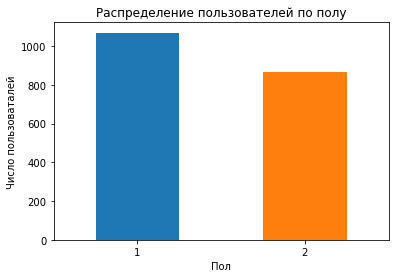

In [138]:
users_df['sex'].value_counts().plot(kind = 'bar', color = ['C0', 'C1'], stacked = True)
plt.title('Распределение пользователей по полу')
plt.xlabel('Пол')
plt.ylabel('Число пользоваталей')
plt.xticks(rotation ='horizontal')

### **4.2. Работа с признаком city**

In [189]:
cities = []
for city in users_df['city'].dropna():
    cities.append(city.get('title'))
unique_cities = []
[unique_cities.append(x) for x in cities if x not in unique_cities]
for unique_city in unique_cities:
    print(unique_city)

Saint Petersburg
Moscow
Obninsk
Helsinki
Khimki
Uman
Seattle
Novosibirsk
Uppsala
Saarbrücken
Hafnarfjörður
Plainsboro
Sochi
Samara
Los Angeles
Rostov-on-Don
Vologda
Berlin
Krasnodar
Kropivnitsky / Kirovograd
Nizhny Novgorod
Jerusalem
Minsk
Aachen
Stavropol
Kazan
Tula
München
Surgut
Bruxelles
Kandalaksha
Cheboxary
Amsterdam
Gatchina
Nevinnomyssk
Brighton
Utrecht
Bucureşti
Boston
New York City
Krasnogorsk
Vladivostok
Volodarskogo
Longmont
Tel Aviv
Barcelona
Irkutsk
Tambov
Apex
Krasnoyarsk
Calgary
Hamburg
Kyiv
Odintsovo
Podolsk
Reykjavík
Yuzhno-Sakhalinsk
Bender
Kaliningrad
Tyumen
Lipetsk
Reutov
Basel
Arkhangelsk
Voronezh
London
Rīga
Yekaterinburg
Dzerzhinsk
Petrozavodsk
Veliky Novgorod
Petropavlovsk-Kamchatsky
Perm
Ramat Gan
Philadelphia
Heidelberg
Balashikha
Manchester
Smolensk
Zelenograd
Tolyatti
Wien
Kharkiv
İstanbul
Aprelevka
Innopolis
Hartford
San Francisco
Ryazan
Korolyov
Ilomantsi
Revda
Vladimir
Praha
Essen
Paris
Sosnovy Bor
Tomsk
Oryol
Liberta
Selyatino (poselok)
Gomel
Krasnogvar

In [190]:
print('Количество уникальных городов:\n', len(unique_cities))

Количество уникальных городов:
 249


In [191]:
print('Количество пропущенных значений для признака city:\n', users_df['city'].isna().sum())

Количество пропущенных значений для признака city:
 599


Выделим элементы словаря для признака city в отдельные столбцы датафрейма.

In [192]:
towns = []
towns_ids = []
for city in users_df['city']:
    try:
        towns.append(city.get('title'))
        towns_ids.append(city.get('id'))
    except:
        towns.append(np.nan)
        towns_ids.append(np.nan)

In [197]:
users_d = users_df.copy()

In [198]:
users_d = users_d.assign(city_id = towns_ids)
users_d = users_d.assign(city_name = towns)
users_d.head()

,id,nickname,city,country,has_photo,has_mobile,can_post,can_see_all_posts,wall_default,can_write_private_message,...,home_town,relation,universities,home_phone,relation_partner,deactivated,online_mobile,online_app,city_id,city_name
0,6,,"{'id': 2, 'title': 'Saint Petersburg'}","{'id': 1, 'title': 'Russia'}",1,1.0,0,0.0,owner,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,Saint Petersburg
1,242,,"{'id': 1, 'title': 'Moscow'}","{'id': 1, 'title': 'Russia'}",1,1.0,0,0.0,owner,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,Moscow
2,908,,"{'id': 2, 'title': 'Saint Petersburg'}","{'id': 1, 'title': 'Russia'}",1,1.0,0,0.0,all,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,Saint Petersburg
3,1119,,"{'id': 2, 'title': 'Saint Petersburg'}","{'id': 1, 'title': 'Russia'}",1,1.0,0,1.0,all,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,Saint Petersburg
4,1649,,"{'id': 1, 'title': 'Moscow'}","{'id': 1, 'title': 'Russia'}",1,1.0,0,0.0,all,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,Moscow


Заменим отсутствующие значения

In [201]:
users_d['city_name'] = users_d['city_name'].fillna('Other')
users_d['city_id'] = users_d['city_id'].fillna(6000000)
users_d.head(2)

,id,nickname,city,country,has_photo,has_mobile,can_post,can_see_all_posts,wall_default,can_write_private_message,...,home_town,relation,universities,home_phone,relation_partner,deactivated,online_mobile,online_app,city_id,city_name
0,6,,"{'id': 2, 'title': 'Saint Petersburg'}","{'id': 1, 'title': 'Russia'}",1,1.0,0,0.0,owner,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,Saint Petersburg
1,242,,"{'id': 1, 'title': 'Moscow'}","{'id': 1, 'title': 'Russia'}",1,1.0,0,0.0,owner,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,Moscow


In [202]:
print('Количество пропущенных значений для признака city_id:\n', users_d['city_id'].isna().sum())
print('Количество пропущенных значений для признака city_name:\n', users_d['city_name'].isna().sum())

Количество пропущенных значений для признака city_id:
 0
Количество пропущенных значений для признака city_name:
 0


In [225]:
city_counts = users_d['city_name'].value_counts()
c1 = list(city_counts[:5])
c2 = list(city_counts.index[:5])
colr = ['red', 'blue', 'green', 'lime', 'magenta']

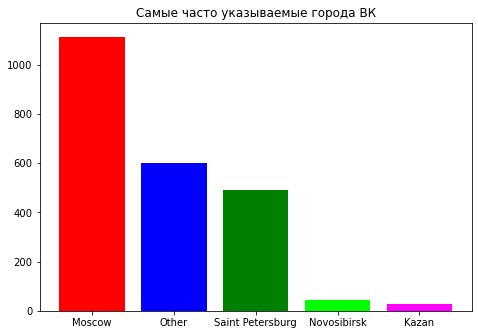

In [232]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.bar(c2, c1, color = colr)
plt.title('Самые часто указываемые города ВК')
plt.show()

### **4.3. Работа с признаком has_mobile**

has_mobile \
Информация о том, известен ли номер мобильного телефона пользователя. \
Возвращаемые значения: 1 — известен, 0 — не известен.

In [230]:
users_d['has_mobile'].unique()

array([ 1.,  0., nan])

In [231]:
print('Количество пропущенных значений для признака has_mobile:\n', users_df['has_mobile'].isna().sum())

Количество пропущенных значений для признака has_mobile:
 140


In [239]:
mob_counts = users_d['has_mobile'].dropna().value_counts()
m1 = list(mob_counts)
m2 = ['Да', 'Нет']
colr = ['lime', 'red']

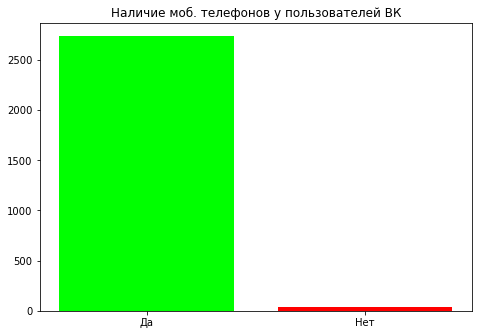

In [240]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.bar(m2, m1, color = colr)
plt.title('Наличие моб. телефонов у пользователей ВК')
plt.show()

У подавляющего большинства пользователей есть номер моб. телефона => вряд ли получим новую информацию. \
Удалим данный признак.

In [243]:
users_d.drop(columns = 'has_mobile', axis = 1, inplace = True)
users_d.head(2)

,id,nickname,city,country,has_photo,can_post,can_see_all_posts,wall_default,can_write_private_message,site,...,home_town,relation,universities,home_phone,relation_partner,deactivated,online_mobile,online_app,city_id,city_name
0,6,,"{'id': 2, 'title': 'Saint Petersburg'}","{'id': 1, 'title': 'Russia'}",1,0,0.0,owner,0,https://telegram.org,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,Saint Petersburg
1,242,,"{'id': 1, 'title': 'Moscow'}","{'id': 1, 'title': 'Russia'}",1,0,0.0,owner,1,https://ezhikov.ru/,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,Moscow


### **4.4. Работа с признаком is_closed**

In [245]:
users_d['is_closed'].unique()

array([False, True, nan], dtype=object)

In [246]:
users_d['is_closed'].dropna().value_counts()

False    2013
True      751
Name: is_closed, dtype: int64

In [251]:
close_counts = users_d['is_closed'].dropna().value_counts()
cl1 = list(close_counts)
cl2 = ['Да', 'Нет']
colr = ['lime', 'red']

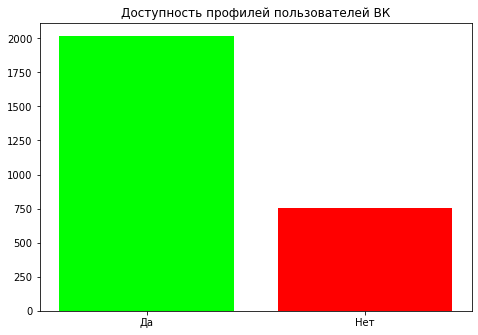

In [252]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.bar(cl2, cl1, color = colr)
plt.title('Доступность профилей пользователей ВК')
plt.show()

Удалим пользователей с nan в данном признаке.

In [253]:
users_d = users_d.dropna(subset = ['is_closed'])

In [255]:
print('Количество пропущенных значений для признака is_closed:\n', users_d['is_closed'].isna().sum())

Количество пропущенных значений для признака is_closed:
 0


Кодируем данный категориальный признак.

In [256]:
users_d0 = users_d.copy()
users_d0["is_closed"] = users_d0["is_closed"].astype('category')
users_d0["is_closed"] = users_d0["is_closed"].cat.codes
users_d0.head()

,id,nickname,city,country,has_photo,can_post,can_see_all_posts,wall_default,can_write_private_message,site,...,home_town,relation,universities,home_phone,relation_partner,deactivated,online_mobile,online_app,city_id,city_name
0,6,,"{'id': 2, 'title': 'Saint Petersburg'}","{'id': 1, 'title': 'Russia'}",1,0,0.0,owner,0,https://telegram.org,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,Saint Petersburg
1,242,,"{'id': 1, 'title': 'Moscow'}","{'id': 1, 'title': 'Russia'}",1,0,0.0,owner,1,https://ezhikov.ru/,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,Moscow
2,908,,"{'id': 2, 'title': 'Saint Petersburg'}","{'id': 1, 'title': 'Russia'}",1,0,0.0,all,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,Saint Petersburg
3,1119,,"{'id': 2, 'title': 'Saint Petersburg'}","{'id': 1, 'title': 'Russia'}",1,0,1.0,all,1,http://www.lastfm.ru/user/in_effect,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,Saint Petersburg
4,1649,,"{'id': 1, 'title': 'Moscow'}","{'id': 1, 'title': 'Russia'}",1,0,0.0,all,0,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,Moscow


In [257]:
users_d0["is_closed"][:5]

0    0
1    0
2    1
3    0
4    0
Name: is_closed, dtype: int8

### **4.4. Работа с признаком country**

In [260]:
countries = []
for country in users_d0['country'].dropna():
    countries.append(country.get('title'))
unique_countries = []
[unique_countries.append(x) for x in countries if x not in unique_countries]
for unique_country in unique_countries:
    print(unique_country)

Russia
Finland
Ukraine
USA
Sweden
Germany
Iceland
Zimbabwe
Japan
Czech Republic
Israel
Belarus
Kyrgyzstan
Belgium
Netherlands
Vatican City
United Kingdom
Spain
Romania
Canada
Moldova
Switzerland
Latvia
Portugal
Austria
Bermuda
Turkey
France
Antigua and Barbuda
Eritrea
Australia
Ireland
Indonesia
Armenia
Serbia
Estonia
Cyprus
Thailand
Hungary
Singapore
Kazakhstan
Denmark
American Samoa
Norway
Italy
Mexico
New Zealand
Poland
Georgia


In [261]:
print('Количество уникальных стран:\n', len(unique_countries))

Количество уникальных стран:
 49


In [262]:
print('Количество пропущенных значений для признака country:\n', users_d0['country'].isna().sum())

Количество пропущенных значений для признака country:
 243


Выделим элементы словаря для признака country в отдельные столбцы датафрейма.

In [264]:
countrs = []
countrs_ids = []
for country in users_d0['country']:
    try:
        countrs.append(country.get('title'))
        countrs_ids.append(country.get('id'))
    except:
        countrs.append(np.nan)
        countrs_ids.append(np.nan)
users_d0 = users_d0.assign(country_id = countrs_ids)
users_d0 = users_d0.assign(country_name = countrs)
users_d0.head()

,id,nickname,city,country,has_photo,can_post,can_see_all_posts,wall_default,can_write_private_message,site,...,universities,home_phone,relation_partner,deactivated,online_mobile,online_app,city_id,city_name,country_id,country_name
0,6,,"{'id': 2, 'title': 'Saint Petersburg'}","{'id': 1, 'title': 'Russia'}",1,0,0.0,owner,0,https://telegram.org,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,Saint Petersburg,1.0,Russia
1,242,,"{'id': 1, 'title': 'Moscow'}","{'id': 1, 'title': 'Russia'}",1,0,0.0,owner,1,https://ezhikov.ru/,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,Moscow,1.0,Russia
2,908,,"{'id': 2, 'title': 'Saint Petersburg'}","{'id': 1, 'title': 'Russia'}",1,0,0.0,all,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,Saint Petersburg,1.0,Russia
3,1119,,"{'id': 2, 'title': 'Saint Petersburg'}","{'id': 1, 'title': 'Russia'}",1,0,1.0,all,1,http://www.lastfm.ru/user/in_effect,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,Saint Petersburg,1.0,Russia
4,1649,,"{'id': 1, 'title': 'Moscow'}","{'id': 1, 'title': 'Russia'}",1,0,0.0,all,0,,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,Moscow,1.0,Russia


Заменим пропущенные значения для стран.

In [267]:
users_d0['country_id'].dropna().unique().max()

233.0

In [268]:
users_d0['country_name'] = users_d0['country_name'].fillna('Other')
users_d0['country_id'] = users_d0['country_id'].fillna(300)
users_d0.head(2)

,id,nickname,city,country,has_photo,can_post,can_see_all_posts,wall_default,can_write_private_message,site,...,universities,home_phone,relation_partner,deactivated,online_mobile,online_app,city_id,city_name,country_id,country_name
0,6,,"{'id': 2, 'title': 'Saint Petersburg'}","{'id': 1, 'title': 'Russia'}",1,0,0.0,owner,0,https://telegram.org,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,Saint Petersburg,1.0,Russia
1,242,,"{'id': 1, 'title': 'Moscow'}","{'id': 1, 'title': 'Russia'}",1,0,0.0,owner,1,https://ezhikov.ru/,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,Moscow,1.0,Russia


In [269]:
print('Количество пропущенных значений для признака country_id:\n', users_d0['country_id'].isna().sum())
print('Количество пропущенных значений для признака country_name:\n', users_d0['country_name'].isna().sum())

Количество пропущенных значений для признака country_id:
 0
Количество пропущенных значений для признака country_name:
 0


In [273]:
country_counts = users_d0['country_name'].value_counts()
cc1 = list(country_counts[:5])
cc2 = list(country_counts.index[:5])
colr = ['red', 'blue', 'green', 'lime', 'magenta']

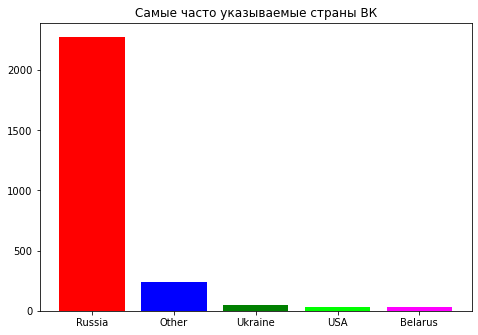

In [274]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.bar(cc2, cc1, color = colr)
plt.title('Самые часто указываемые страны ВК')
plt.show()

Удалим столбцы, которые уже обработали.

In [276]:
users_d0.drop(columns = ['city', 'country'], axis = 1, inplace = True)
users_d0.head(2)

,id,nickname,has_photo,can_post,can_see_all_posts,wall_default,can_write_private_message,site,status,occupation,...,universities,home_phone,relation_partner,deactivated,online_mobile,online_app,city_id,city_name,country_id,country_name
0,6,,1,0,0.0,owner,0,https://telegram.org,Some people choose to see the ugliness in this...,"{'id': 1, 'name': 'СПбГУ', 'type': 'university'}",...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,Saint Petersburg,1.0,Russia
1,242,,1,0,0.0,owner,1,https://ezhikov.ru/,Executive-коуч. Помогаю руководителям осознать...,"{'name': 'Zest Leaders', 'type': 'work'}",...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,Moscow,1.0,Russia


### **4.6. Работа с признаком can_see_all_posts**

In [279]:
users_d0['can_see_all_posts'].unique()

array([0., 1.])

In [283]:
def plotBinaryFeature(dataset, column_name, title, colors = ['lime', 'red']):
    li = dataset[column_name].dropna().value_counts()
    x = list(li)
    y = ['Да', 'Нет']
    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1])
    ax.bar(y, x, color = colors)
    plt.title(title)
    plt.show()

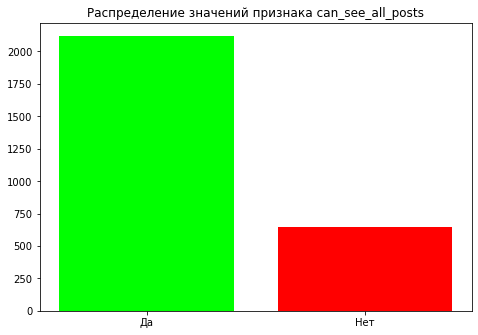

In [286]:
plotBinaryFeature(users_d0, 'can_see_all_posts', 'Распределение значений признака can_see_all_posts')

Кодируем данные

In [288]:
users_d0["can_see_all_posts"] = users_d0["can_see_all_posts"].astype('category')
users_d0["can_see_all_posts"] = users_d0["can_see_all_posts"].cat.codes
users_d0.head()

,id,nickname,has_photo,can_post,can_see_all_posts,wall_default,can_write_private_message,site,status,occupation,...,universities,home_phone,relation_partner,deactivated,online_mobile,online_app,city_id,city_name,country_id,country_name
0,6,,1,0,0,owner,0,https://telegram.org,Some people choose to see the ugliness in this...,"{'id': 1, 'name': 'СПбГУ', 'type': 'university'}",...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,Saint Petersburg,1.0,Russia
1,242,,1,0,0,owner,1,https://ezhikov.ru/,Executive-коуч. Помогаю руководителям осознать...,"{'name': 'Zest Leaders', 'type': 'work'}",...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,Moscow,1.0,Russia
2,908,,1,0,0,all,1,NaN,Sult,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,Saint Petersburg,1.0,Russia
3,1119,,1,0,1,all,1,http://www.lastfm.ru/user/in_effect,,"{'id': 94, 'name': 'Университет ИТМО', 'type':...",...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,Saint Petersburg,1.0,Russia
4,1649,,1,0,0,all,0,,Ом,"{'id': 1, 'name': 'СПбГУ', 'type': 'university'}",...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,Moscow,1.0,Russia


### **4.7. Работа с признаком has_photo**

In [287]:
users_d0['has_photo'].unique()

array([1, 0], dtype=int64)

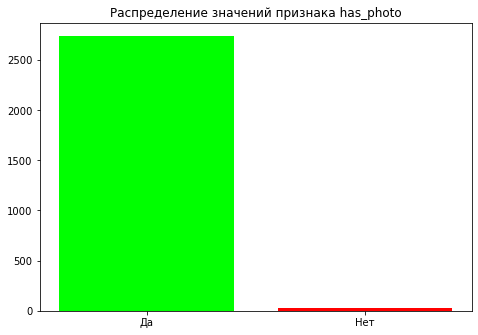

In [289]:
plotBinaryFeature(users_d0, 'has_photo', 'Распределение значений признака has_photo')

У подавляющего большинства пользователей есть фото => вряд ли получим новую информацию. \
Удалим данный признак.

In [290]:
users_d0.drop(columns = 'has_photo', axis = 1, inplace = True)
users_d0.head(2)

,id,nickname,can_post,can_see_all_posts,wall_default,can_write_private_message,site,status,occupation,counters,...,universities,home_phone,relation_partner,deactivated,online_mobile,online_app,city_id,city_name,country_id,country_name
0,6,,0,0,owner,0,https://telegram.org,Some people choose to see the ugliness in this...,"{'id': 1, 'name': 'СПбГУ', 'type': 'university'}","{'albums': 2, 'audios': 14, 'followers': 55152...",...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,Saint Petersburg,1.0,Russia
1,242,,0,0,owner,1,https://ezhikov.ru/,Executive-коуч. Помогаю руководителям осознать...,"{'name': 'Zest Leaders', 'type': 'work'}","{'albums': 0, 'audios': 513, 'followers': 2757...",...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,Moscow,1.0,Russia


### **4.8. Работа с признаком can_post**

can_post \
integer \
Информация о том, может ли текущий пользователь оставлять записи на стене. \
Возможные значения: \
•
1 — может;

•
0 — не может

In [291]:
users_d0['can_post'].unique()

array([0, 1], dtype=int64)

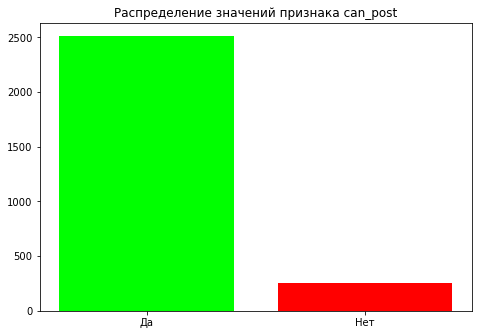

In [292]:
plotBinaryFeature(users_d0, 'can_post', 'Распределение значений признака can_post')

### 4.9. Работа с признаком can_write_private_message

can_write_private_message 

integer \
Информация о том, может ли текущий пользователь отправить личное сообщение. \
Возможные значения: \
•
1 — может;

•
0 — не может

In [294]:
users_d0['can_write_private_message'].unique()

array([0, 1], dtype=int64)

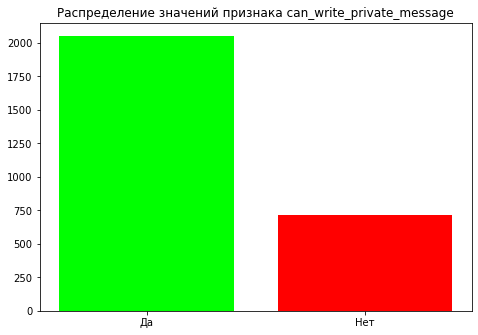

In [295]:
plotBinaryFeature(users_d0, 'can_write_private_message', 'Распределение значений признака can_write_private_message')

### 4.10. Работа с признаком wall_default

In [297]:
users_d0['wall_default'].unique()

array(['owner', 'all'], dtype=object)

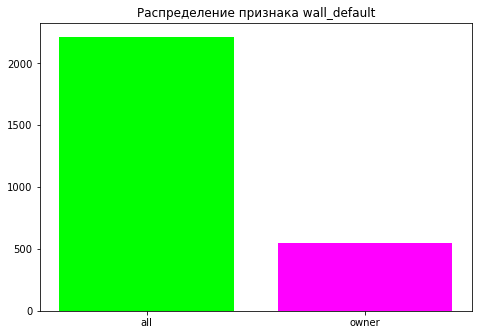

In [302]:
wall = users_d0['wall_default'].dropna().value_counts()
x = list(wall)
y = wall.index
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.bar(y, x, color = ['lime', 'magenta'])
plt.title('Распределение признака wall_default')
plt.show()

### 4.11. Работа с признаком status

In [303]:
unique_statuses = users_d0['status'].unique()
unique_status

array(['Some people choose to see the ugliness in this world, the disarray. I choose to see the beauty.',
       'Executive-коуч. Помогаю руководителям осознать свою личную миссию и следовать ей.',
       'Sult', ...,
       'Тому, кто умеет ждать — всегда достается самое лучшее!',
       'У меня все хорошо, просто редко пользуюсь этой страницей а удалить жалко',
       'https://www.instagram.com/p/Bw3sPOElD42/?igshid=ailco12asggj всё тут'],
      dtype=object)

In [305]:
print('Количество уникальных статусов:\n', users_d0['status'].nunique())

Количество уникальных статусов:
 1421


In [307]:
users_d0['status'].value_counts()

                                                                           1329
...                                                                           4
¯\_(ツ)_/¯                                                                     3
Москва                                                                        3
.                                                                             3
                                                                           ... 
The words of the prophets are written on the subway walls                     1
Все в группу АНТРОПОГЕНЕЗ.РУ!!! https://vk.com/antropogenez_ru                1
Танцуй честно..                                                               1
— Ты вообще с головой дружишь? — Больше того — мы спим вместе!                1
https://www.instagram.com/reel/CajT_XjJBUJ/?utm_source=ig_web_copy_link       1
Name: status, Length: 1421, dtype: int64

In [304]:
print('Количество пропущенных значений для признака status:\n', users_d0['status'].isna().sum())

Количество пропущенных значений для признака status:
 0


Все статусы очень разные => сложно найти какой-то паттерн. \
Но можно воспользоваться этим признаком для создания признака наличия статуса.

In [308]:
users_d0['status'].replace({"": "no status"}, inplace = True)

In [309]:
users_d0['status']

0       Some people choose to see the ugliness in this...
1       Executive-коуч. Помогаю руководителям осознать...
2                                                    Sult
3                                               no status
4                                                      Ом
                              ...                        
2899                                            no status
2900                                            no status
2901    Тому, кто умеет ждать — всегда достается самое...
2902    У меня все хорошо, просто редко пользуюсь этой...
2903    https://www.instagram.com/p/Bw3sPOElD42/?igshi...
Name: status, Length: 2764, dtype: object

In [314]:
users_d1 = users_d0.copy()
users_d1['status'].mask(users_d1['status'] != 'no status', 'has status', inplace = True)

In [316]:
users_d1["status"] = users_d1["status"].astype('category')
users_d1["status"] = users_d1["status"].cat.codes
users_d1.head(2)

,id,nickname,can_post,can_see_all_posts,wall_default,can_write_private_message,site,status,occupation,counters,...,universities,home_phone,relation_partner,deactivated,online_mobile,online_app,city_id,city_name,country_id,country_name
0,6,,0,0,owner,0,https://telegram.org,0,"{'id': 1, 'name': 'СПбГУ', 'type': 'university'}","{'albums': 2, 'audios': 14, 'followers': 55152...",...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,Saint Petersburg,1.0,Russia
1,242,,0,0,owner,1,https://ezhikov.ru/,0,"{'name': 'Zest Leaders', 'type': 'work'}","{'albums': 0, 'audios': 513, 'followers': 2757...",...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,Moscow,1.0,Russia


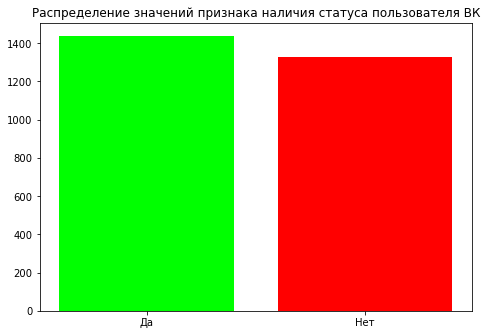

In [317]:
plotBinaryFeature(users_d1, 'status', 'Распределение значений признака наличия статуса пользователя ВК')

### 4.12. Работа с признаком relation

In [318]:
users_d1.relation.unique()

array([nan,  0.,  4.,  6.,  1.,  8.,  7.,  2.,  5.,  3.])

In [319]:
users_d1['relation'].fillna(-1, inplace = True)

#### 4.12.1. Категоризация признака relation

In [320]:
users_d1["relation"] = users_d1["relation"].astype('category')
users_d1["relation"] = users_d1["relation"].cat.codes
users_d1.relation.unique()

array([0, 1, 5, 7, 2, 9, 8, 3, 6, 4], dtype=int8)

### 4.13. Работа с прочими одномерными признаками

In [321]:
users_d1.deactivated.unique()

array([nan], dtype=object)

In [322]:
del users_d1['deactivated']

In [324]:
users_d1.nickname.nunique()

281

In [325]:
users_d1['nickname'].isna().sum()

0

In [326]:
users_d0['nickname'].value_counts()

                 2470
Alexandrovich       5
Alexandrovna        3
Borisovich          3
Nikolaevich         2
                 ... 
Delfi               1
0 who               1
..                  1
<na Kone>           1
"Valet2"            1
Name: nickname, Length: 281, dtype: int64

In [327]:
del users_d1['nickname']

In [329]:
del users_d1['last_name']
del users_d1['first_name']
del users_d1['relation_partner']

In [331]:
users_d1['home_town'].isna().sum()

1922

In [334]:
users_d1.home_town.unique()

array([nan, 'Ленинград', 'Выборг, Санкт-Петербург, Никополь', 'Байконур',
       'Москва', 'Санкт-Петербург', '', 'Санкт-Петербург, Париж, Сиэтл',
       'Питер', 'Санкт-Петербург, Пушкин',
       'Ленинград, Мончегорск, Новгород', 'Satan-Petersburg', 'Орша',
       'Новомосковск', 'Спб', 'Магадан', 'Полярные Зори', 'питер',
       'Ульяновск', 'Пущино', 'Тольятти', 'Химки, Москва', 'Протвино',
       'о. Сахалин, п. Восток', 'Кронштадт', 'Новый Свет', 'Океан',
       'Saint-Petersburg', 'Ленинград, Гатчина',
       'Железногорск Красн.край', 'Ленинград, Санкт-Петербург',
       'над вольной Невой', 'Киев', 'Ковров', 'Салават', 'Одесса',
       'Ростов-на-Дону, Знаменск, Санкт-Петербург',
       'Питер, причем ночной', 'Южно-Сахалинск', 'Борисоглебск',
       'Чайковский', 'Ленинград\\Санкт-Петербург', 'Зион', 'г. Фрязино',
       'Moscow', 'Сливен, Москва', 'Урук', 'Хвостовиль', 'Подольск',
       'Milky Way Galaxy', 'Самара', 'Орел', 'Арнем (Нидерланды)',
       'Лохвица', '...', 'Ко

In [332]:
users_d1['home_phone'].isna().sum()

2502

In [335]:
users_d1.home_phone.unique()

array([nan, '', 'пользуюсь skype', 'отсутствует', 'skype: Avatara1987 ',
       '+78126402868', 'Telegram: slavazamyslov', 'Сферический',
       'redbanner@mail.ru', 'нет', 'Panasonic', '-', '+79516880959',
       'Нет дома)', 'два-два-два-три-два-два-',
       'Остсутствует. Как и дом.', '+7 915 322 18 31 Москва', '(812)..',
       '88007005452', 'постоянно занят', 'семизначный', '+74951002119',
       'нету', ' ', '714****', 'Раритетной марки',
       'вопросы смело в личку ;)', 'С попутным голубем', '+79061022121',
       '8(985)198 75 93', '89882822810', 'shilinstas@yandex.ru',
       '8 (495) 958-21-50 ^_^', '8-913-670-0-670', 'Skype: Disa_Anna.',
       '+79111212828', 'Top Secret', 'не знаю - себе не звоню)',
       'Трубкозуб', '+79996311290', 'химицу дес~', 'telegram.me/scvairy',
       '404', '5***5', '02', '+7 (902) 198-22-71 Арх', '456', 'есть',
       '(473) 258-24-88', 'nemustactical@gmail.com', 'Irbis_KblCb',
       '89650809081'], dtype=object)

In [333]:
users_d1['mobile_phone'].isna().sum()

2523

In [336]:
users_d1.mobile_phone.unique()

array([nan, '+7 (921) 918-00-09', '', 'никаких звонков — пишите',
       '891128082шеcть9', '+7 921 6377597', '+792195873*7',
       '+79633441180', '+7921-HEAD-320', '8 (929) 309 4800',
       'Прямоугольный', 'нет', 'Nokia', '-', '+7 921 385-65-34',
       '89139016124', '8-911-127-91-34 Питер', '*100#',
       'Все время меняется', '+7 911 716 4 716', '+79251990455',
       '8-904-332-78-72', '+79627161358', '+7(903)1688870',
       '+7 (900) 580-30-30', '+7 921 930-4160', '0x14E1E62229',
       '+7(812)9617799', '89991234567', '89057284002', '+7-910-705-74-31',
       'Nexus 5', '+7 916 578 9352', '8 916 644 91 12',
       '+7 902 374 51 74', 'https://t.me/kampinski_c', '+15164007584',
       'телефон изменился ', '+79031039737', 'онлайн с телефона',
       '+7 981 765 53 79', '+79057323066', '(965)366-73-37',
       'Служит будильником', 'Не стесняемся, все', '+7-902-281-07-29',
       'Siemens', '+7978-847-29-47', '9139104197', '+7 916 122-2365',
       'С попутным вороном', 'POC

In [ ]:
del users_d1['last_name']
del users_d1['first_name']
del users_d1['relation_partner']

In [337]:
del users_d1['home_town']
del users_d1['home_phone']
del users_d1['mobile_phone']

In [339]:
del users_d1['city_name']
del users_d1['country_name']

**online** \
Информация о том, находится ли пользователь сейчас на сайте. \
Если пользователь использует мобильное приложение либо мобильную версию, возвращается дополнительное поле **online_mobile**, содержащее 1. \
При этом, если используется именно приложение, дополнительно возвращается поле **online_app**, содержащее его идентификатор

In [341]:
users_d1.online_mobile.unique()

array([nan,  1.])

In [342]:
users_d1.online_app.unique()

array([     nan, 2274003., 3140623., 2685278., 5027722.])

In [343]:
users_d1['online_mobile'].isna().sum()

2642

In [344]:
users_d1['online_app'].isna().sum()

2652

In [345]:
del users_d1['online_mobile']
del users_d1['online_app']

In [346]:
users_d1.columns

Index(['id', 'can_post', 'can_see_all_posts', 'wall_default',
       'can_write_private_message', 'site', 'status', 'occupation', 'counters',
       'sex', 'online', 'can_access_closed', 'is_closed', 'bdate', 'relation',
       'universities', 'city_id', 'country_id'],
      dtype='object')

### 4.14. Работа с признаком site

In [347]:
unique_sites = users_d1['site'].unique()
unique_sites

array(['https://telegram.org', 'https://ezhikov.ru/', nan,
       'http://www.lastfm.ru/user/in_effect', '', 'productcamp.ru',
       'montpan.com', 'http://vkontakte.ru/id5236',
       'https://sites.google.com/view/nvi366812', 'null',
       'defense-network.livejournal.com', 'http://afanasiefff.ru/',
       'нету', 'http://rare-guest.livejournal.com/',
       'https://telegram.me/sciencegram',
       'https://www.instagram.com/kventr/', 'http://www.buchin.info/',
       'https://inozemtseva.online/',
       'http://instagram.com/geller, http://www.showersong.noisegames.com/',
       'http://allfouryou.ru/', 'http://vk.com/v.v.antonov',
       'http://stihi.ru/avtor/worldsoul  ',
       'https://www.facebook.com/sirozha', 'http://www.valet2.com',
       'http://9232561.ru/',
       'http://www.proza.ru/author.html?potamophylax   http://potamophylax.livejournal.com/',
       'http://www.polniylevak.narod.ru', 'http://vkontakte.ru/venumshop',
       'https://vk.com/arcticburg',
       

In [348]:
print('Количество уникальных сайтов:\n', users_d1['site'].nunique())

Количество уникальных сайтов:
 690


In [349]:
users_d1['site'].value_counts()

                                                                             1314
нет                                                                             4
                                                                                3
-                                                                               3
https://www.instagram.com/merimi.ru/                                            2
                                                                             ... 
https://vk.com/public_60                                                        1
http://mk.tula.ru/search/?tags=%D1%82%D1%83%D1%81%D0%BE%D0%B2%D0%BA%D0%B0       1
https://mywishboard.com/@gorkovenkoaa                                           1
http://contentim.ru/                                                            1
http://aging-genes.livejournal.com/                                             1
Name: site, Length: 690, dtype: int64

Все сайты очень разные => сложно найти какой-то паттерн. \
Но можно воспользоваться этим признаком для создания признака наличия сайта.

In [351]:
print('Количество пропущенных значений для признака site:\n', users_d1['site'].isna().sum())

Количество пропущенных значений для признака site:
 751


In [352]:
users_d1['site'].replace({"": "no site"}, inplace = True)
users_d1['site'].replace({" ": "no site"}, inplace = True)
users_d1['site'].replace({"-": "no site"}, inplace = True)
users_d1['site'].replace({"нет": "no site"}, inplace = True)

In [353]:
users_d1['site'] = users_d1['site'].fillna("no site")

In [399]:
users_d2 = users_d1.copy()
users_d2['site'].mask(users_d1['site'] != 'no site', 'has site', inplace = True)

In [400]:
users_d2["site"] = users_d2["site"].astype('category')
users_d2["site"] = users_d2["site"].cat.codes
users_d2.head(2)

,id,can_post,can_see_all_posts,wall_default,can_write_private_message,site,status,occupation,counters,sex,online,can_access_closed,is_closed,bdate,relation,universities,city_id,country_id
0,6,0,0,owner,0,0,0,"{'id': 1, 'name': 'СПбГУ', 'type': 'university'}","{'albums': 2, 'audios': 14, 'followers': 55152...",2,0,True,0,NaN,0,NaN,2.0,1.0
1,242,0,0,owner,1,0,0,"{'name': 'Zest Leaders', 'type': 'work'}","{'albums': 0, 'audios': 513, 'followers': 2757...",2,0,True,0,15.8.1983,0,NaN,1.0,1.0


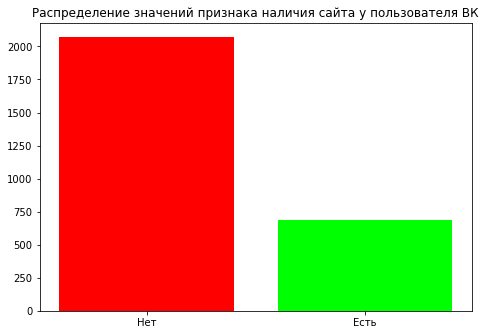

In [401]:
sites = users_d2['site'].dropna().value_counts()
x = list(sites)
y = ['Нет', 'Есть']
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.bar(y, x, color = ['red', 'lime'])
plt.title('Распределение значений признака наличия сайта у пользователя ВК')
plt.show()

### 4.15. Работа с признаком universities

In [402]:
u = users_d2['universities'].dropna()
u[5][0]

{'city': 2,
 'country': 1,
 'graduation': 2012,
 'id': 17,
 'name': 'НИУ ВШЭ (СПб)'}

In [403]:
univers = []
for univer in users_d2['universities']:
    try:
        univers.append(univer[0].get('name'))
    except:
        univers.append(np.nan)
users_d2 = users_d2.assign(univer_name = univers)
users_d2.head()

,id,can_post,can_see_all_posts,wall_default,can_write_private_message,site,status,occupation,counters,sex,online,can_access_closed,is_closed,bdate,relation,universities,city_id,country_id,univer_name
0,6,0,0,owner,0,0,0,"{'id': 1, 'name': 'СПбГУ', 'type': 'university'}","{'albums': 2, 'audios': 14, 'followers': 55152...",2,0,True,0,NaN,0,NaN,2.0,1.0,NaN
1,242,0,0,owner,1,0,0,"{'name': 'Zest Leaders', 'type': 'work'}","{'albums': 0, 'audios': 513, 'followers': 2757...",2,0,True,0,15.8.1983,0,NaN,1.0,1.0,NaN
2,908,0,0,all,1,1,0,NaN,"{'albums': 0, 'audios': 0, 'pages': 56, 'subsc...",2,0,False,1,25.2.1988,0,NaN,2.0,1.0,NaN
3,1119,0,1,all,1,0,1,"{'id': 94, 'name': 'Университет ИТМО', 'type':...","{'albums': 12, 'audios': 109, 'followers': 857...",2,0,True,0,5.6,0,NaN,2.0,1.0,NaN
4,1649,0,0,all,0,1,0,"{'id': 1, 'name': 'СПбГУ', 'type': 'university'}","{'albums': 0, 'audios': 0, 'followers': 1025, ...",1,0,True,0,27.6.1987,0,NaN,1.0,1.0,NaN


In [404]:
users_d2['univer_name'] = users_d2['univer_name'].fillna("no univer")

In [405]:
users_d2["univer_name"] = users_d2["univer_name"].astype('category')
users_d2["univer_name"] = users_d2["univer_name"].cat.codes

### 4.16. Работа с признаком occupation

In [406]:
o = users_d2['occupation'].dropna()
type(o[0])

dict

In [407]:
print('Количество пропущенных значений для признака occupation:\n', users_d2['occupation'].isna().sum())

Количество пропущенных значений для признака occupation:
 531


In [416]:
users_d3 = users_d2.copy()
users_d3 = users_d3.dropna(subset = ['occupation'])

In [417]:
print('Количество пропущенных значений для признака occupation:\n', users_d3['occupation'].isna().sum())

Количество пропущенных значений для признака occupation:
 0


In [421]:
users_d3['occupation'][1]

{'name': 'Zest Leaders', 'type': 'work'}

In [423]:
works = []
for work in users_d3['occupation']:
        if work.get('type') == 'work':
            works.append(work.get('name'))
        else:
            works.append('no work')
users_d3 = users_d3.assign(work_place = works)
users_d3.head()

,id,can_post,can_see_all_posts,wall_default,can_write_private_message,site,status,occupation,counters,sex,online,can_access_closed,is_closed,bdate,relation,universities,city_id,country_id,univer_name,work_place
0,6,0,0,owner,0,0,0,"{'id': 1, 'name': 'СПбГУ', 'type': 'university'}","{'albums': 2, 'audios': 14, 'followers': 55152...",2,0,True,0,NaN,0,NaN,2.0,1.0,5,no work
1,242,0,0,owner,1,0,0,"{'name': 'Zest Leaders', 'type': 'work'}","{'albums': 0, 'audios': 513, 'followers': 2757...",2,0,True,0,15.8.1983,0,NaN,1.0,1.0,5,Zest Leaders
3,1119,0,1,all,1,0,1,"{'id': 94, 'name': 'Университет ИТМО', 'type':...","{'albums': 12, 'audios': 109, 'followers': 857...",2,0,True,0,5.6,0,NaN,2.0,1.0,5,Университет ИТМО
4,1649,0,0,all,0,1,0,"{'id': 1, 'name': 'СПбГУ', 'type': 'university'}","{'albums': 0, 'audios': 0, 'followers': 1025, ...",1,0,True,0,27.6.1987,0,NaN,1.0,1.0,5,no work
5,2050,1,1,owner,0,1,0,"{'id': 58810575, 'name': 'Happy Santa', 'type'...","{'albums': 8, 'audios': 1005, 'followers': 194...",1,0,True,0,27.4,1,"[{'city': 2, 'country': 1, 'graduation': 2012,...",2.0,1.0,176,Happy Santa


### 4.17 Еще немного обработки данных

In [424]:
del users_d3['occupation']
del users_d3['universities']

In [425]:
users_d3["work_place"] = users_d3["work_place"].astype('category')
users_d3["work_place"] = users_d3["work_place"].cat.codes
users_d3.head(2)

,id,can_post,can_see_all_posts,wall_default,can_write_private_message,site,status,counters,sex,online,can_access_closed,is_closed,bdate,relation,city_id,country_id,univer_name,work_place
0,6,0,0,owner,0,0,0,"{'albums': 2, 'audios': 14, 'followers': 55152...",2,0,True,0,NaN,0,2.0,1.0,5,285
1,242,0,0,owner,1,0,0,"{'albums': 0, 'audios': 513, 'followers': 2757...",2,0,True,0,15.8.1983,0,1.0,1.0,5,266


In [426]:
users_d3["can_access_closed"] = users_d3["can_access_closed"].astype('category')
users_d3["can_access_closed"] = users_d3["can_access_closed"].cat.codes
del users_d3['online']

In [428]:
users_d3["wall_default"] = users_d3["wall_default"].astype('category')
users_d3["wall_default"] = users_d3["wall_default"].cat.codes

In [429]:
users_d3.head(1)

,id,can_post,can_see_all_posts,wall_default,can_write_private_message,site,status,counters,sex,can_access_closed,is_closed,bdate,relation,city_id,country_id,univer_name,work_place
0,6,0,0,1,0,0,0,"{'albums': 2, 'audios': 14, 'followers': 55152...",2,1,0,NaN,0,2.0,1.0,5,285


### 4.18. Работа с признаком counters

In [433]:
o = users_d3['counters'].dropna()
type(o[0])

dict

In [434]:
o[0]

{'albums': 2,
 'audios': 14,
 'followers': 55152,
 'pages': 137,
 'photos': 21,
 'subscriptions': 13,
 'videos': 32,
 'clips_followers': 55444}

In [435]:
print('Количество пропущенных значений для признака counters:\n', users_d3['counters'].isna().sum())

Количество пропущенных значений для признака counters:
 0


In [436]:
users_d4 = users_d3.copy()
albums = []
audios = []
friends = []
photos = []
videos = []
pages = []
for counter in users_d4['counters']:
            albums.append(counter.get('albums'))
            audios.append(counter.get('audios'))
            friends.append(counter.get('friends'))
            photos.append(counter.get('photos'))
            videos.append(counter.get('videos'))
            pages.append(counter.get('pages'))

In [437]:
users_d4 = users_d4.assign(albums = albums)
users_d4 = users_d4.assign(audios = audios)
users_d4 = users_d4.assign(friends = friends)
users_d4 = users_d4.assign(photos = photos)
users_d4 = users_d4.assign(videos = videos)
users_d4 = users_d4.assign(pages = pages)
users_d4.head()

,id,can_post,can_see_all_posts,wall_default,can_write_private_message,site,status,counters,sex,can_access_closed,...,city_id,country_id,univer_name,work_place,albums,audios,friends,photos,videos,pages
0,6,0,0,1,0,0,0,"{'albums': 2, 'audios': 14, 'followers': 55152...",2,1,...,2.0,1.0,5,285,2,14,None,21.0,32,137
1,242,0,0,1,1,0,0,"{'albums': 0, 'audios': 513, 'followers': 2757...",2,1,...,1.0,1.0,5,266,0,513,None,218.0,65,19
3,1119,0,1,0,1,0,1,"{'albums': 12, 'audios': 109, 'followers': 857...",2,1,...,2.0,1.0,5,728,12,109,None,731.0,6,60
4,1649,0,0,0,0,1,0,"{'albums': 0, 'audios': 0, 'followers': 1025, ...",1,1,...,1.0,1.0,5,285,0,0,None,286.0,35,29
5,2050,1,1,1,0,1,0,"{'albums': 8, 'audios': 1005, 'followers': 194...",1,1,...,2.0,1.0,176,85,8,1005,None,776.0,82,246


#### Подготовка к выгрузке в файл

In [438]:
del users_d4['counters']
del users_d4['bdate']

In [439]:
users_d4['friends'].replace({"": 0}, inplace = True)
users_d4['friends'].unique()

array([None], dtype=object)

In [440]:
del users_d4['friends']

In [441]:
users_d4.head()

,id,can_post,can_see_all_posts,wall_default,can_write_private_message,site,status,sex,can_access_closed,is_closed,relation,city_id,country_id,univer_name,work_place,albums,audios,photos,videos,pages
0,6,0,0,1,0,0,0,2,1,0,0,2.0,1.0,5,285,2,14,21.0,32,137
1,242,0,0,1,1,0,0,2,1,0,0,1.0,1.0,5,266,0,513,218.0,65,19
3,1119,0,1,0,1,0,1,2,1,0,0,2.0,1.0,5,728,12,109,731.0,6,60
4,1649,0,0,0,0,1,0,1,1,0,0,1.0,1.0,5,285,0,0,286.0,35,29
5,2050,1,1,1,0,1,0,1,1,0,1,2.0,1.0,176,85,8,1005,776.0,82,246


In [452]:
users_d4 = users_d4.dropna(subset = ['albums', 'audios', 'photos', 'videos', 'pages'])

In [453]:
users_d4['albums'] = users_d4.albums.astype(int)
users_d4['audios'] = users_d4.audios.astype(int)
users_d4['photos'] = users_d4.photos.astype(int)
users_d4['videos'] = users_d4.videos.astype(int)
users_d4['pages'] = users_d4.pages.astype(int)

In [458]:
users_d4["city_id"] = users_d4["city_id"].astype('category')
users_d4["city_id"] = users_d4["city_id"].cat.codes
users_d4["country_id"] = users_d4["country_id"].astype('category')
users_d4["country_id"] = users_d4["country_id"].cat.codes

### Сохраняем почти готовый датасет в файл и загружаем

In [459]:
export_csv = users_d4.to_csv(r'vk_users.csv', index = None, header = True)

In [460]:
dfU = pd.read_csv('vk_users.csv')
dfU.head()

,id,can_post,can_see_all_posts,wall_default,can_write_private_message,site,status,sex,can_access_closed,is_closed,relation,city_id,country_id,univer_name,work_place,albums,audios,photos,videos,pages
0,6,0,0,1,0,0,0,2,1,0,0,1,0,5,285,2,14,21,32,137
1,242,0,0,1,1,0,0,2,1,0,0,0,0,5,266,0,513,218,65,19
2,1119,0,1,0,1,0,1,2,1,0,0,1,0,5,728,12,109,731,6,60
3,1649,0,0,0,0,1,0,1,1,0,0,0,0,5,285,0,0,286,35,29
4,2050,1,1,1,0,1,0,1,1,0,1,1,0,176,85,8,1005,776,82,246


### 4.19. Создание синтетических признаков transparency_level и media

In [461]:
# удаляем выбросы для медиа
columns = ['albums', 'audios', 'photos', 'videos']

In [462]:
for i in columns:
  Q3 = np.quantile(dfU[i], 0.85)
  Q1 = np.quantile(dfU[i], 0.25)
  TIQR = 3 * (Q3 - Q1)
  dfU = dfU.drop(dfU[dfU[i] > (Q3 + TIQR)].index)
  dfU = dfU.drop(dfU[dfU[i] < (Q1 - TIQR)].index)

In [464]:
dfU = dfU.reset_index()
dfU.head(1)

,index,id,can_post,can_see_all_posts,wall_default,can_write_private_message,site,status,sex,can_access_closed,...,relation,city_id,country_id,univer_name,work_place,albums,audios,photos,videos,pages
0,0,6,0,0,1,0,0,0,2,1,...,0,1,0,5,285,2,14,21,32,137


In [466]:
del dfU['index']

In [467]:
dfU.head(1)

,id,can_post,can_see_all_posts,wall_default,can_write_private_message,site,status,sex,can_access_closed,is_closed,relation,city_id,country_id,univer_name,work_place,albums,audios,photos,videos,pages
0,6,0,0,1,0,0,0,2,1,0,0,1,0,5,285,2,14,21,32,137


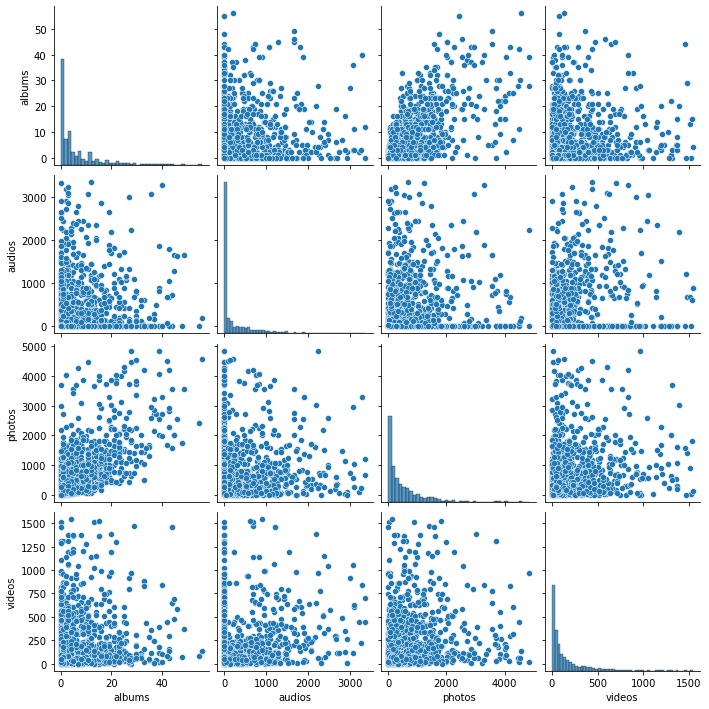

In [468]:
sns.pairplot(data = dfU[columns])

In [470]:
dfU['transparency_level'] = dfU.is_closed + dfU.can_post + dfU.can_see_all_posts + dfU.can_write_private_message + dfU.wall_default

In [471]:
dfU['media'] = dfU.audios + dfU.videos + dfU.photos + dfU.albums

In [472]:
dfU.head(2)

,id,can_post,can_see_all_posts,wall_default,can_write_private_message,site,status,sex,can_access_closed,is_closed,...,country_id,univer_name,work_place,albums,audios,photos,videos,pages,transparency_level,media
0,6,0,0,1,0,0,0,2,1,0,...,0,5,285,2,14,21,32,137,1,69
1,242,0,0,1,1,0,0,2,1,0,...,0,5,266,0,513,218,65,19,2,796


In [473]:
export_csv = dfU.to_csv(r'vk_users_fin.csv', index = None, header = True)
dfUsers = pd.read_csv('vk_users_fin.csv')
dfUsers.head()

,id,can_post,can_see_all_posts,wall_default,can_write_private_message,site,status,sex,can_access_closed,is_closed,...,country_id,univer_name,work_place,albums,audios,photos,videos,pages,transparency_level,media
0,6,0,0,1,0,0,0,2,1,0,...,0,5,285,2,14,21,32,137,1,69
1,242,0,0,1,1,0,0,2,1,0,...,0,5,266,0,513,218,65,19,2,796
2,1119,0,1,0,1,0,1,2,1,0,...,0,5,728,12,109,731,6,60,2,858
3,1649,0,0,0,0,1,0,1,1,0,...,0,5,285,0,0,286,35,29,0,321
4,2050,1,1,1,0,1,0,1,1,0,...,0,176,85,8,1005,776,82,246,3,1871


In [474]:
dfUsers.shape

(1571, 22)

In [475]:
dfUsers.isna().sum()

id                           0
can_post                     0
can_see_all_posts            0
wall_default                 0
can_write_private_message    0
site                         0
status                       0
sex                          0
can_access_closed            0
is_closed                    0
relation                     0
city_id                      0
country_id                   0
univer_name                  0
work_place                   0
albums                       0
audios                       0
photos                       0
videos                       0
pages                        0
transparency_level           0
media                        0
dtype: int64

### Применение методов Scaler к набору данных

In [478]:
from sklearn.preprocessing import *

In [476]:
data = dfUsers.copy()

In [480]:
df_norm = data.copy(deep=True)
df_minmax = data.copy(deep=True)
df_stand = data.copy(deep=True)
df_maxabs = data.copy(deep=True)
df_robust = data.copy(deep=True)
df_powert = data.copy(deep=True)

norm = Normalizer().fit(df_norm)
minmax = MinMaxScaler().fit(df_minmax)
stand = StandardScaler().fit(df_stand)
maxabs = MaxAbsScaler().fit(df_maxabs)
robust = RobustScaler().fit(df_robust)
powert = PowerTransformer().fit(df_powert)

df_to_norm = norm.transform(df_norm)
df_to_minmax = minmax.transform(df_minmax)
df_to_stand = stand.transform(df_stand)
df_to_maxabs = maxabs.transform(df_maxabs)
df_to_robust = robust.transform(df_robust)
df_to_powert = powert.transform(df_powert)

df_norm = pd.DataFrame(df_to_norm)
df_minmax = pd.DataFrame(df_to_minmax)
df_stand = pd.DataFrame(df_to_stand)
df_maxabs = pd.DataFrame(df_to_maxabs)
df_robust = pd.DataFrame(df_to_robust)
df_powert = pd.DataFrame(df_to_powert)

df_notscaled = data.copy(deep=True)

C:\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


In [481]:
df_norm.name = 'Normalizer'
df_minmax.name = 'MinMaxScaler'
df_stand.name = 'StandardScaler'
df_maxabs.name = 'MaxAbsScaler'
df_robust.name = 'RobustScaler'
df_powert.name = 'PowerTransformer'
df_notscaled.name = 'Not Scaled'

### Создание конвейера для подбора лучшей модели

In [482]:
from sklearn.cluster import *
from sklearn.metrics import *

In [483]:
float_frames = [df_norm, df_minmax, df_stand, df_maxabs, df_robust, df_powert, df_notscaled]
methods = [KMeans(), MiniBatchKMeans(), 
           AffinityPropagation(), 
           AgglomerativeClustering(), 
           MeanShift()]

metrics = pd.DataFrame(columns = ['Method', 'Scaler', 'Silhouette Score', 'Davies Bouldin Score', 'Inertia'])

In [484]:
r = 5

two_methods = ['KMeans', 'MiniBatchKMeans']

for j in float_frames:
  for l in methods:
    est = l.fit(j)

    method_name = str(est)[:str(est).find('(')]

    to_df = pd.DataFrame(est.labels_)
    to_df.columns = ['labels']
    n_labels = len(to_df.labels.unique())

    if method_name in two_methods:
      if n_labels > 1:
        metrics = metrics.append({'Method': str(est)[:str(est).find('(')], 'Scaler': j.name,
                                'Silhouette Score': round(silhouette_score(j, est.labels_), r),
                                'Davies Bouldin Score': round(davies_bouldin_score(j, est.labels_), r),
                                'Inertia': round(est.inertia_, r)
                                }, ignore_index=True)
      else:
        metrics = metrics.append({'Method': str(est)[:str(est).find('(')], 'Scaler': j.name,
                                'Silhouette Score': '-',
                                'Davies Bouldin Score': '-',
                                'Inertia': round(est.inertia_, r)
                                }, ignore_index=True)
    else:
      if n_labels > 1:
        metrics = metrics.append({'Method': str(est)[:str(est).find('(')], 'Scaler': j.name,
                                'Silhouette Score': round(silhouette_score(j, est.labels_), r),
                                'Davies Bouldin Score': round(davies_bouldin_score(j, est.labels_), r),
                                'Inertia': '-'
                                }, ignore_index=True)
      else:
        metrics = metrics.append({'Method': str(est)[:str(est).find('(')], 'Scaler': j.name,
                                'Silhouette Score': '-',
                                'Davies Bouldin Score': '-',
                                'Inertia': '-'
                                }, ignore_index=True)

C:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\cluster\_affinity_propagation.py:148: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 1.0 (renaming of 0.25) which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=1
  warni

In [485]:
metrics[(metrics['Silhouette Score'] != '-') & (metrics['Davies Bouldin Score'] != '-')].sort_values(by='Silhouette Score', ascending=False)

,Method,Scaler,Silhouette Score,Davies Bouldin Score,Inertia
3,AgglomerativeClustering,Normalizer,0.98959,0.46441,-
0,KMeans,Normalizer,0.94685,0.5055,0.2602
4,MeanShift,Normalizer,0.84689,0.30034,-
23,AgglomerativeClustering,RobustScaler,0.79201,0.40394,-
33,AgglomerativeClustering,Not Scaled,0.71302,0.42185,-
34,MeanShift,Not Scaled,0.70798,0.41671,-
30,KMeans,Not Scaled,0.58234,0.49152,1530016167146213.75
31,MiniBatchKMeans,Not Scaled,0.57321,0.49425,1614218933630438.5
24,MeanShift,RobustScaler,0.45458,1.02486,-
1,MiniBatchKMeans,Normalizer,0.40797,1.28744,5.68768


### Лучшая комбинация AgglomerativeClustering + Normalizer, но мы воспользуемся robust

In [486]:
ss_kmeans = []
bd_kmeans = []
ss_agg = []
bd_agg = []
ss_mb = []
bd_mb = []

x = df_robust

for k in range(2, 11):
  est = KMeans(n_clusters=k)
  est.fit(x)
  ss_kmeans.append(silhouette_score(x, est.labels_))
  bd_kmeans.append(davies_bouldin_score(x, est.labels_))

for k in range(2, 11):
  est = AgglomerativeClustering(n_clusters=k)
  est.fit(x)
  ss_agg.append(silhouette_score(x, est.labels_))
  bd_agg.append(davies_bouldin_score(x, est.labels_))

for k in range(2, 11):
  est = MiniBatchKMeans(n_clusters=k)
  est.fit(x)
  ss_mb.append(silhouette_score(x, est.labels_))
  bd_mb.append(davies_bouldin_score(x, est.labels_))

C:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\cluster

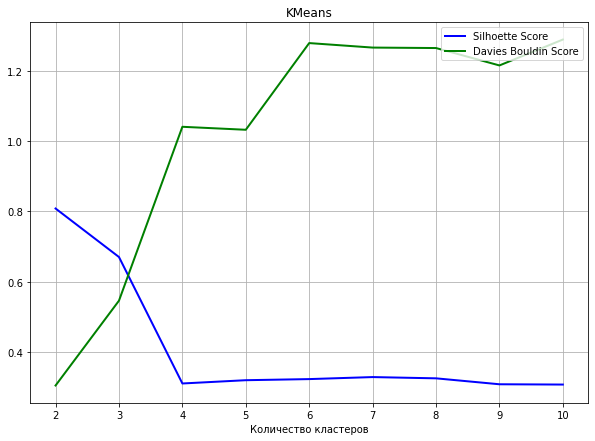

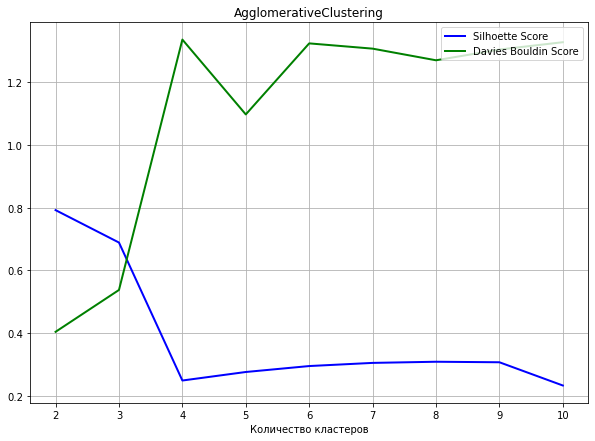

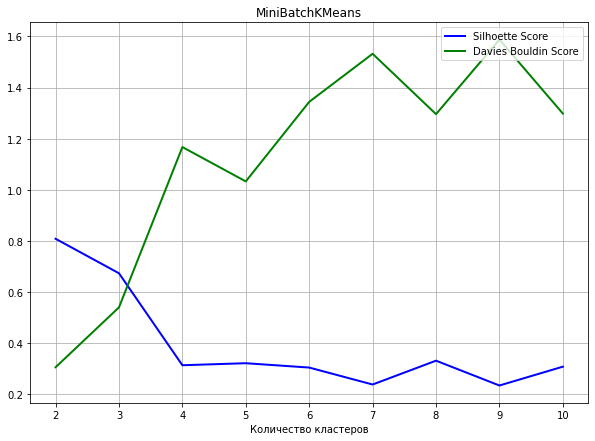

In [487]:
plt.figure(figsize=(10, 7))
plt.plot(ss_kmeans, linewidth=2, color='blue')
plt.plot(bd_kmeans, linewidth=2, color='green')
plt.title('KMeans')
plt.legend(['Silhoette Score', 'Davies Bouldin Score'], loc=1)
plt.xlabel('Количество кластеров')

points = [0, 1, 2, 3, 4, 5, 6, 7, 8]
labels = ['2', '3', '4', '5', '6', '7', '8', '9', '10']
plt.xticks(points, labels)

plt.grid(True)
plt.show()

plt.figure(figsize=(10, 7))
plt.plot(ss_agg, linewidth=2, color='blue')
plt.plot(bd_agg, linewidth=2, color='green')
plt.title('AgglomerativeClustering')
plt.legend(['Silhoette Score', 'Davies Bouldin Score'], loc=1)
plt.xlabel('Количество кластеров')

plt.xticks(points, labels)

plt.grid(True)
plt.show()

plt.figure(figsize=(10, 7))
plt.plot(ss_mb, linewidth=2, color='blue')
plt.plot(bd_mb, linewidth=2, color='green')
plt.title('MiniBatchKMeans')
plt.legend(['Silhoette Score', 'Davies Bouldin Score'], loc=1)
plt.xlabel('Количество кластеров')

plt.xticks(points, labels)

plt.grid(True)
plt.show()

#### Делим пользователей на 7 кластеров

In [510]:
def fit_AC_clusters(nClusters):
    x = df_robust
    est = AgglomerativeClustering(n_clusters = nClusters)
    est.fit(x)
    print('SS/DBS', 
      round(silhouette_score(x, est.labels_), 5),
      '/',
      round(davies_bouldin_score(x, est.labels_), 5))
    labels = pd.DataFrame(est.labels_)
    labels.columns = ['cluster']
    df_clusters = pd.concat([dfUsers, labels], axis=1)
    sns.countplot(df_clusters.cluster)

SS/DBS 0.30485 / 1.30693


C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


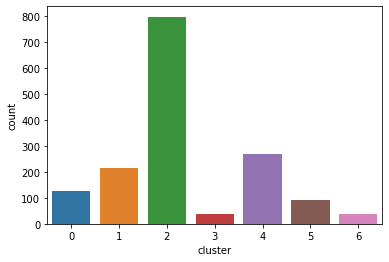

In [511]:
fit_AC_clusters(7)

#### Делим пользователей на 3 и 4 кластера

SS/DBS 0.68863 / 0.53741


C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


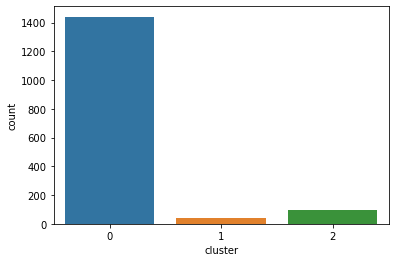

In [514]:
fit_AC_clusters(3)

SS/DBS 0.24866 / 1.33585


C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


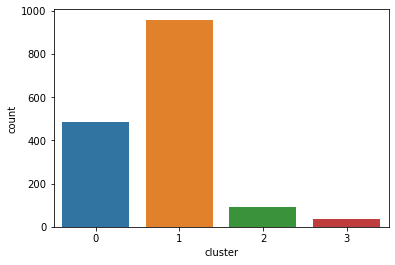

In [515]:
fit_AC_clusters(4)

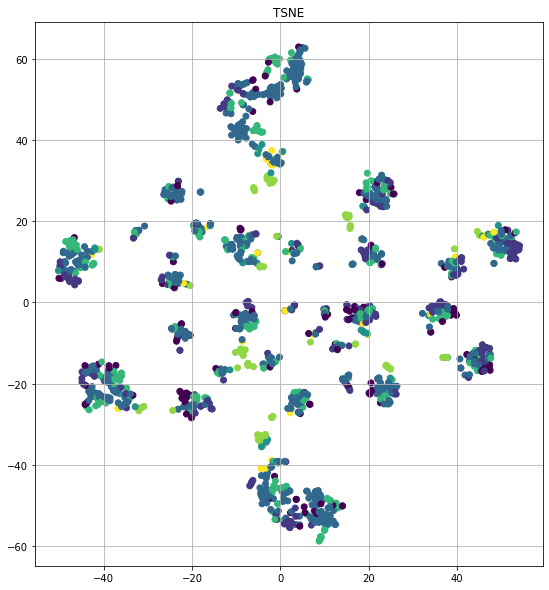

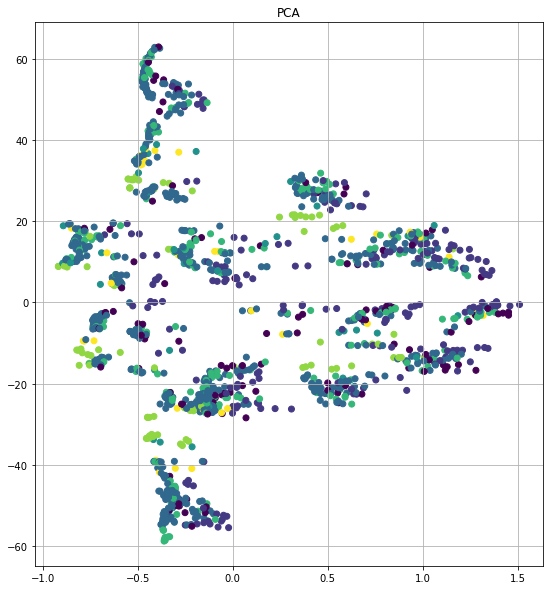

In [516]:
from sklearn.manifold import *
from sklearn.decomposition import PCA

x = df_maxabs

tsne = TSNE(n_components=2
            ,random_state=22
            ).fit_transform(x)

pca = PCA().fit_transform(x)

plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.scatter(tsne[:, 0], tsne[:, 1], c=est.labels_)
plt.title('TSNE')
plt.grid(True)

plt.figure(figsize=(20, 10))
plt.subplot(122)
plt.scatter(pca[:, 0], tsne[:, 1], c=est.labels_)
plt.title('PCA')
plt.grid(True)

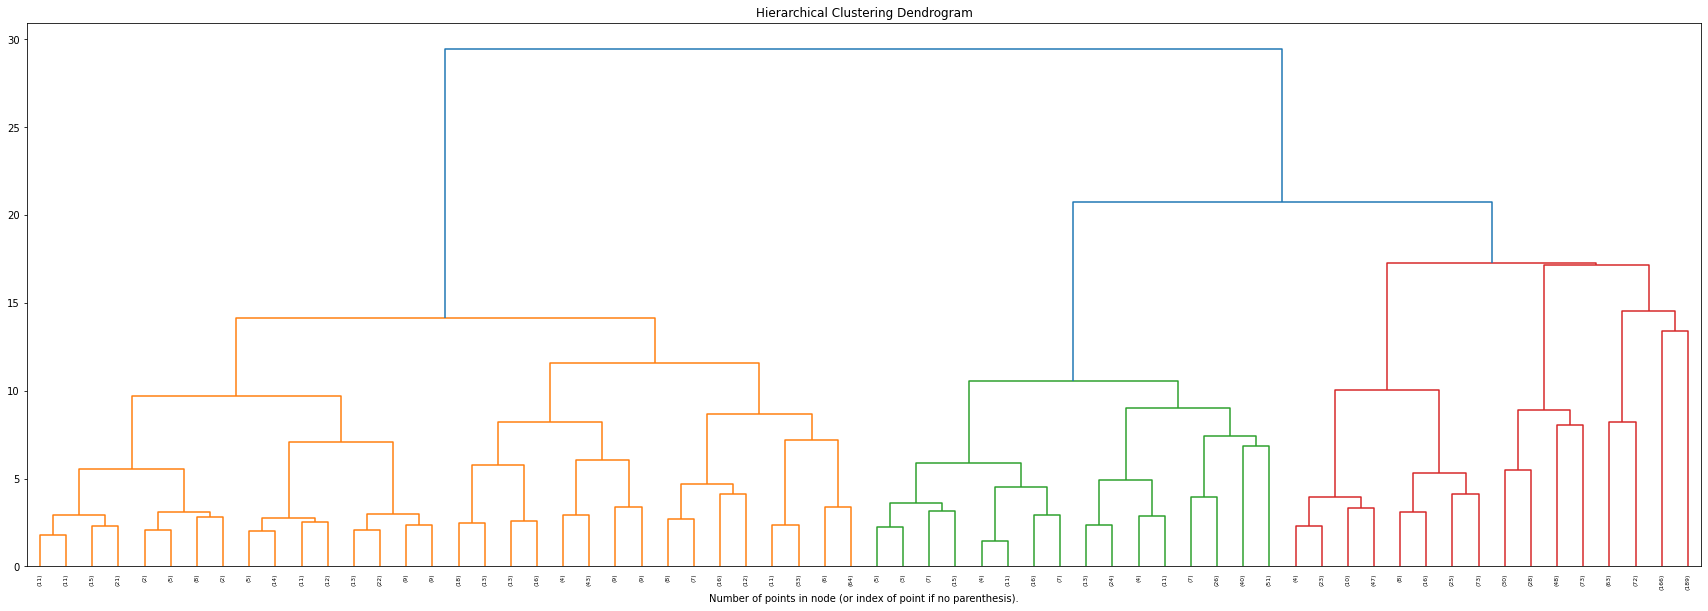

In [517]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(df_maxabs)
plt.figure(figsize=(30, 10))
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=5)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

## Подписки верифицированных пользователей

In [430]:
def getVerifiedUsers(users):
    verified_users = [user for user in users if user.get('verified') == 1]
    print('Пользователей с галочкой: ', len(verified_users))
    return verified_users

In [432]:
verified_users = getVerifiedUsers(users_data)

Пользователей с галочкой:  0


In [115]:
writeRequestResultToJSON(verified_users, 'verified_users')

In [116]:
verified_users_data = readRequestResultFromJSON("json_verified_users.json")
verified_users_data

[{'id': 190868,
  'bdate': '20.5',
  'city': {'id': 2, 'title': 'Saint Petersburg'},
  'country': {'id': 1, 'title': 'Russia'},
  'followers_count': 306786,
  'occupation': {'id': 18403220, 'name': 'UsachevShow', 'type': 'work'},
  'career': [{'city_id': 2,
    'country_id': 1,
    'from': 1989,
    'group_id': 18403220,
    'position': 'Руслан'}],
  'university': 0,
  'university_name': '',
  'faculty': 0,
  'faculty_name': '',
  'graduation': 0,
  'relation': 0,
  'personal': {'alcohol': 1,
   'inspired_by': 'курение и алкоголь',
   'smoking': 1},
  'universities': [],
  'sex': 2,
  'verified': 1,
  'first_name': 'Ruslan',
  'last_name': 'Usachev',
  'can_access_closed': True,
  'is_closed': False},
 {'id': 300063,
  'bdate': '31.10',
  'city': {'id': 2, 'title': 'Saint Petersburg'},
  'country': {'id': 1, 'title': 'Russia'},
  'followers_count': 19326,
  'occupation': {'id': 32773524,
   'name': 'Фотограф Михаил Тарасов',
   'type': 'work'},
  'career': [{'city_id': 2,
    'country_

In [140]:
token = getAccessToken("token.txt")
session = vk.Session(access_token = token)
vk_api = vk.API(session)

In [159]:
def getUserSubscription(user_id):
    user_subscriptions = vk_api.users.getSubscriptions(user_id = user_id, v = 5.131)
    return user_subscriptions

In [172]:
def getVerifiedUsersSubscriptions(verified_users):
    verified_users_subscriptions = []
    for verified_user in verified_users:
        user_id = verified_user.get('id')
        time.sleep(.2)
        user_subscriptions = getUserSubscription(user_id)
        verified_users_subscriptions.append(user_subscriptions['groups'])
        time.sleep(.2)
    return verified_users_subscriptions

In [173]:
verified_users_subscriptions = getVerifiedUsersSubscriptions(verified_users_data)

In [174]:
writeRequestResultToJSON(verified_users_subscriptions, 'verified_subscriptions')

In [175]:
verified_subscriptions_data = readRequestResultFromJSON("json_verified_subscriptions.json")
verified_subscriptions_data[0]

{'count': 23,
 'items': [18403220,
  66687279,
  101209760,
  113086748,
  29534144,
  36965584,
  60394841,
  25336774,
  4325149,
  4537617,
  25084840,
  32943546,
  33393308,
  34072502,
  34088205,
  55072656,
  74404187,
  79138567,
  87396564,
  91496259,
  91933860,
  109575676,
  150317037]}